In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, re
import gc
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [81]:
path = 'C:/final_prj/open/'
files = os.listdir(path)
parquet_files = [f for f in files if re.search(r'\.parquet$', f)]


In [82]:
def null_check(df) :
    missing_strs = ['NA', 'NaN', 'null', 'N/A', '', ' ']
    df = df.replace(missing_strs, pd.NA)
    null_cols = df.columns[df.isnull().any()]
    for col in null_cols  :
        n_counts = df[col].isnull().sum()
        print(f'null counts : {n_counts :,}')
        print(f'null ratio : {n_counts/len(df) :.2%}')
        print(df[col].value_counts())
        print('########' * 8)

In [83]:
def encode(df, method) :
    if method == 'label' :
        # 명목형 데이터 : 라벨 인코딩 (간단한 경우)
        for col in obj_cols:
            print(x[col].value_counts())
            x[col] = LabelEncoder().fit_transform(df[col])
            print(x[col].value_counts())
    if method == 'ordinal' :
        # 순서형 데이터 : 각 값의 숫자로 인코딩
        for col in obj_cols:
            print(x[col].value_counts())
            x[col] = x[col].str.extract(r'(\d+)').astype(int)
            print(x[col].value_counts())
    return x

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def vif(x) :
    # 전처리

    # x = x.loc[:, x.nunique() > 1]  # 상수 컬럼 제거
    # x = x.replace([np.inf, -np.inf], np.nan).dropna()  # 결측/무한값 제거
    
    # 상수항 추가
    x_const = add_constant(x)
    
    # VIF 계산
    vif = pd.DataFrame()
    vif["Feature"] = x_const.columns
    vif["VIF"] = [variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]
    print(vif.sort_values("VIF", ascending=False))
    return vif

# 마케팅정보

In [85]:
parquet_files

['test_마케팅정보_total.parquet',
 'train_마케팅정보_total.parquet',
 'train_성과정보_total.parquet']

In [86]:
####
print(parquet_files[1])
df =pd.read_parquet(path + 'train_마케팅정보_total.parquet')
df.head()

train_마케팅정보_total.parquet


,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_카드론_당사앱_R6M,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15회 이상,10일 이상
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상


In [87]:
df.shape

(2400000, 64)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400000 entries, 0 to 399999
Data columns (total 64 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   기준년월               int64 
 1   ID                 object
 2   컨택건수_카드론_TM_B0M    int64 
 3   컨택건수_리볼빙_TM_B0M    int64 
 4   컨택건수_CA_TM_B0M     int64 
 5   컨택건수_이용유도_TM_B0M   int64 
 6   컨택건수_신용발급_TM_B0M   int64 
 7   컨택건수_부대서비스_TM_B0M  int64 
 8   컨택건수_포인트소진_TM_B0M  int64 
 9   컨택건수_보험_TM_B0M     int64 
 10  컨택건수_카드론_LMS_B0M   int64 
 11  컨택건수_CA_LMS_B0M    int64 
 12  컨택건수_리볼빙_LMS_B0M   int64 
 13  컨택건수_이용유도_LMS_B0M  int64 
 14  컨택건수_카드론_EM_B0M    int64 
 15  컨택건수_CA_EM_B0M     int64 
 16  컨택건수_리볼빙_EM_B0M    int64 
 17  컨택건수_이용유도_EM_B0M   int64 
 18  컨택건수_카드론_청구서_B0M   int64 
 19  컨택건수_CA_청구서_B0M    int64 
 20  컨택건수_리볼빙_청구서_B0M   int64 
 21  컨택건수_이용유도_청구서_B0M  int64 
 22  컨택건수_카드론_인터넷_B0M   int64 
 23  컨택건수_CA_인터넷_B0M    int64 
 24  컨택건수_리볼빙_인터넷_B0M   int64 
 25  컨택건수_이용유도_인터넷_B0M  int64 
 26  컨택건수_카드론_당사앱_B0M   i

### 결측치 확인

In [89]:
# 결측치 확인
null_check(df) 

- 결측치 확인
  - 없음

### 인코딩
- 범주형 데이터 2개 모두 순서형 -> ordinal encoding
- 캠페인접촉건수_R12M, 캠페인접촉건수_R12M

In [90]:
# object 컬럼 확인
## 컬럼 제거
drop_cols = ['기준년월', 'ID']
x = df.drop(columns=drop_cols)
obj_cols = x.select_dtypes(include='object').columns
x[obj_cols].head()

,캠페인접촉건수_R12M,캠페인접촉일수_R12M
0,1회 이상,1일 이상
1,15회 이상,10일 이상
2,1회 이상,1일 이상
3,1회 이상,1일 이상
4,1회 이상,1일 이상


In [91]:
x = encode(df,'ordinal')

캠페인접촉건수_R12M
1회 이상     1719595
5회 이상      374546
10회 이상     146157
15회 이상      96869
20회 이상      62828
25회 이상          5
Name: count, dtype: int64
캠페인접촉건수_R12M
1     1719595
5      374546
10     146157
15      96869
20      62828
25          5
Name: count, dtype: int64
캠페인접촉일수_R12M
1일 이상     1754523
5일 이상      365606
10일 이상     141573
15일 이상     109795
20일 이상      28503
Name: count, dtype: int64
캠페인접촉일수_R12M
1     1754523
5      365606
10     141573
15     109795
20      28503
Name: count, dtype: int64


## 컬럼 필터

### 1. 결측치
- 30% 미만
- 결측치 없음

### 2. 분산 
<!-- - 0.001 이상 -->
-  0.01

In [92]:
# 분산 확인
variances = x.var()
print(variances.sort_values(ascending=False))
print(variances.describe())
# 2. 분산이 0.001 이하인 컬럼명 리스트
cols_to_drop = variances[variances <= 0.01].index.to_list()
X = x.drop(columns=cols_to_drop)


print(f"제거된 컬럼 개수: {len(cols_to_drop)}")
print(f"남은 컬럼 개수: {X.shape[1]}")


컨택건수_이용유도_EM_R6M     390.029088
캠페인접촉건수_R12M          19.797819
컨택건수_이용유도_LMS_R6M     18.699368
컨택건수_이용유도_EM_B0M      16.647538
캠페인접촉일수_R12M          16.443900
                        ...    
컨택건수_카드론_인터넷_B0M       0.000000
컨택건수_리볼빙_당사앱_B0M       0.000000
컨택건수_CA_당사앱_B0M        0.000000
컨택건수_카드론_당사앱_B0M       0.000000
컨택건수_리볼빙_EM_R6M        0.000000
Length: 62, dtype: float64
count     62.000000
mean       8.031926
std       49.536506
min        0.000000
25%        0.000000
50%        0.002231
75%        0.253224
max      390.029088
dtype: float64
제거된 컬럼 개수: 37
남은 컬럼 개수: 25


In [93]:
X.columns

Index(['컨택건수_카드론_TM_B0M', '컨택건수_이용유도_TM_B0M', '컨택건수_보험_TM_B0M',
       '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_청구서_B0M',
       '컨택건수_이용유도_인터넷_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_리볼빙_TM_R6M',
       '컨택건수_이용유도_TM_R6M', '컨택건수_부대서비스_TM_R6M', '컨택건수_보험_TM_R6M',
       '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_이용유도_LMS_R6M',
       '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M',
       '컨택건수_CA_청구서_R6M', '컨택건수_이용유도_청구서_R6M', '컨택건수_이용유도_인터넷_R6M',
       '컨택건수_채권_B0M', '컨택건수_채권_R6M', '캠페인접촉건수_R12M', '캠페인접촉일수_R12M'],
      dtype='object')

컨택건수_이용유도_EM_R6M
0     668056
1     208161
2     185772
3     163325
4     134917
       ...  
72       527
75       307
71       114
77        52
76         2
Name: count, Length: 79, dtype: int64


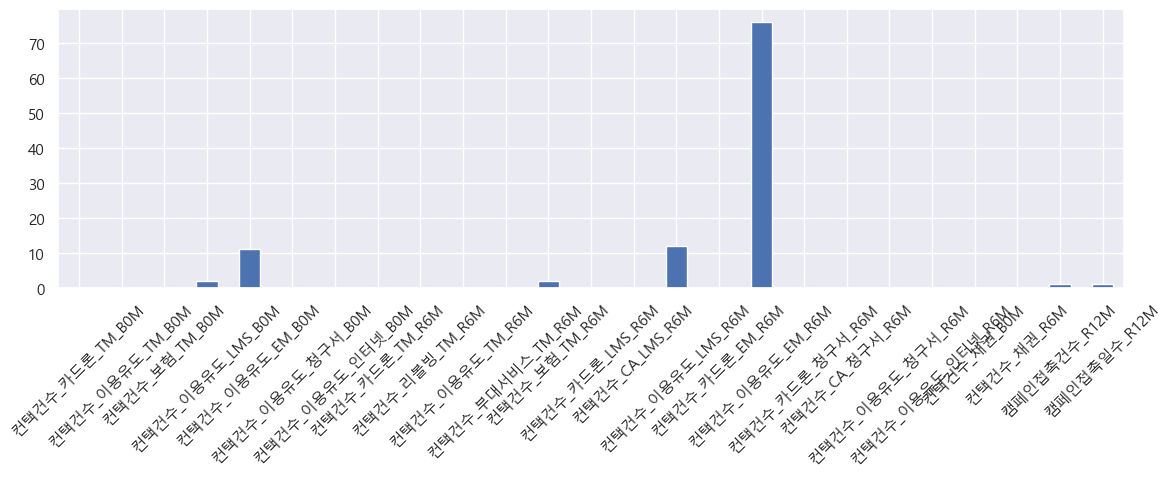

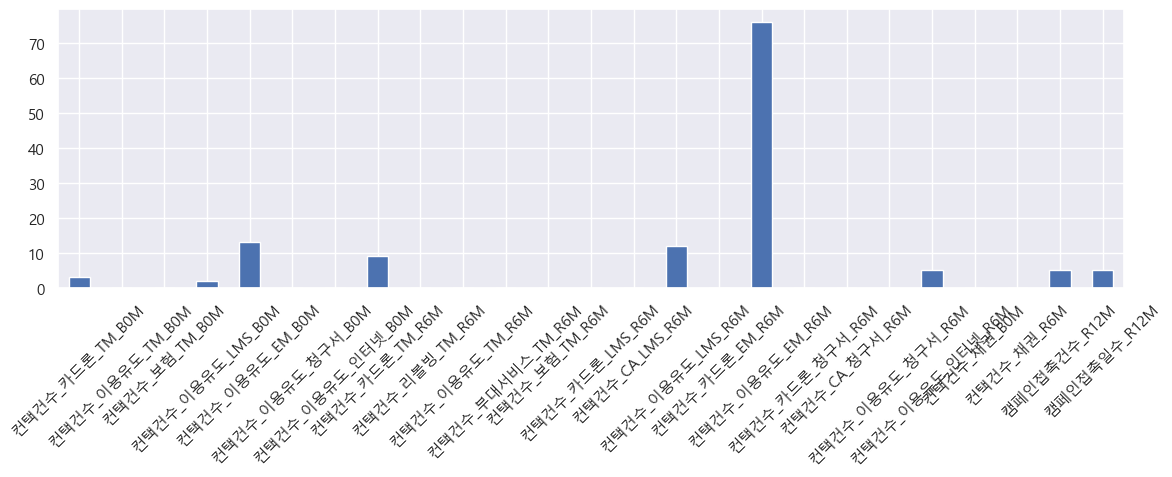

In [94]:
# 분산이 큰 컬럼 확인
# 
print(X['컨택건수_이용유도_EM_R6M'].value_counts())
tmp = X.loc[X['컨택건수_이용유도_EM_R6M'] == 76]
for i in range(len(tmp)):
    tmp.iloc[i].plot(kind='bar', figsize=(12, 5))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- 컬럼들의 컬럼내 분산 값 범위가 크기때문에 표준화 진행

In [95]:
scaler1 = StandardScaler()
scaler1.fit(X)
X_scaler = scaler1.transform(X)
X_scaled_df = pd.DataFrame(X_scaler, columns=X.columns, index=X.index)
X_scaled_df

,컨택건수_카드론_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_보험_TM_B0M,컨택건수_이용유도_LMS_B0M,컨택건수_이용유도_EM_B0M,컨택건수_이용유도_청구서_B0M,컨택건수_이용유도_인터넷_B0M,컨택건수_카드론_TM_R6M,컨택건수_리볼빙_TM_R6M,컨택건수_이용유도_TM_R6M,...,컨택건수_카드론_EM_R6M,컨택건수_이용유도_EM_R6M,컨택건수_카드론_청구서_R6M,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M
0,-0.237600,-0.166101,-0.115502,1.389719,2.736532,-0.620742,-0.496037,-0.496125,-0.162171,0.940135,...,-0.113513,2.251020,-0.222570,-0.32909,-0.806316,-0.172143,-0.071789,-0.198142,-0.502271,-0.494774
1,4.062522,-0.166101,-0.115502,-0.672453,-0.449634,-0.620742,2.015981,1.935266,-0.162171,0.434572,...,-0.113513,-0.533910,4.537558,2.91085,-0.369142,1.743946,-0.071789,-0.198142,2.644169,1.724650
2,-0.237600,-0.166101,-0.115502,-0.672453,-0.449634,-0.620742,-0.496037,-0.496125,-0.162171,0.434572,...,-0.113513,-0.027559,-0.222570,-0.32909,-0.369142,0.306879,-0.071789,-0.198142,-0.502271,-0.494774
3,-0.237600,-0.166101,-0.115502,1.389719,2.736532,1.333509,-0.496037,-0.496125,-0.162171,0.434572,...,-0.113513,1.137048,-0.222570,-0.32909,0.068032,-1.130187,-0.071789,-0.198142,-0.502271,-0.494774
4,-0.237600,-0.166101,-0.115502,2.420805,-0.449634,1.333509,-0.496037,-0.496125,-0.162171,2.962385,...,-0.113513,-0.635181,-0.222570,-0.32909,0.942381,-0.651165,-0.071789,-0.198142,-0.502271,-0.494774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,-0.237600,-0.166101,-0.115502,-0.672453,-0.449634,-0.620742,-0.496037,-0.496125,-0.162171,-0.576553,...,-0.113513,-0.635181,-0.222570,-0.32909,-0.806316,-1.130187,-0.071789,-0.198142,-0.502271,-0.494774
399996,-0.237600,-0.166101,-0.115502,1.389719,2.736532,-0.620742,-0.496037,1.935266,-0.162171,-0.576553,...,-0.113513,2.301655,-0.222570,-0.32909,-0.806316,-1.130187,-0.071789,-0.198142,3.767898,2.957663
399997,-0.237600,-0.166101,-0.115502,-0.672453,-0.449634,1.333509,-0.496037,-0.496125,-0.162171,-0.576553,...,-0.113513,-0.635181,-0.222570,-0.32909,1.816729,-1.130187,-0.071789,-0.198142,-0.502271,-0.494774
399998,-0.237600,-0.166101,-0.115502,-0.672453,-0.449634,-0.620742,-0.496037,-0.496125,-0.162171,-0.576553,...,-0.113513,-0.635181,-0.222570,-0.32909,0.942381,-0.651165,-0.071789,-0.198142,-0.502271,-0.494774


### 3. 다중공선성 제거

- 상관관계 확인
  <!-- - 0.7 이하 -->
- 0.6 이하

In [96]:
import numpy as np
# 1. 상관행렬 계산
corr_matrix = X_scaled_df.corr().abs()

# 2. 자기 자신 제외 (대각선 제거)
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# # 3. 상관계수 0.7 이상인 컬럼 찾기
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

# 4. 해당 컬럼 제거
X_filtered = X.drop(columns=to_drop)
print(f'남은 컬럼 개수 {len(X_filtered.columns)}')

남은 컬럼 개수 20


In [97]:
upper

,컨택건수_카드론_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_보험_TM_B0M,컨택건수_이용유도_LMS_B0M,컨택건수_이용유도_EM_B0M,컨택건수_이용유도_청구서_B0M,컨택건수_이용유도_인터넷_B0M,컨택건수_카드론_TM_R6M,컨택건수_리볼빙_TM_R6M,컨택건수_이용유도_TM_R6M,...,컨택건수_카드론_EM_R6M,컨택건수_이용유도_EM_R6M,컨택건수_카드론_청구서_R6M,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M
컨택건수_카드론_TM_B0M,NaN,0.026483,0.026568,0.125898,0.101519,0.025095,0.014757,0.584260,0.111809,0.009708,...,0.085407,0.110166,0.115623,0.140527,0.023006,0.007121,0.016577,0.025552,0.555678,0.556173
컨택건수_이용유도_TM_B0M,NaN,NaN,0.014861,0.173035,0.004004,0.054036,0.029733,0.000291,0.022206,0.525483,...,0.002711,0.022219,0.020190,0.044785,0.033567,0.038780,0.011403,0.026648,0.018365,0.018906
컨택건수_보험_TM_B0M,NaN,NaN,NaN,0.018446,0.012725,0.025533,0.031083,0.025231,0.009912,0.023370,...,0.011182,0.015380,0.003138,0.009171,0.028787,0.030376,0.006370,0.010699,0.011449,0.013811
컨택건수_이용유도_LMS_B0M,NaN,NaN,NaN,NaN,0.396845,0.001385,0.009779,0.199489,0.087969,0.279286,...,0.074418,0.428545,0.021158,0.004352,0.017830,0.077834,0.029907,0.042744,0.200290,0.198562
컨택건수_이용유도_EM_B0M,NaN,NaN,NaN,NaN,NaN,0.048926,0.060823,0.159659,0.080815,0.061208,...,0.093343,0.904203,0.015134,0.040060,0.075383,0.058445,0.018503,0.025996,0.153489,0.151222
컨택건수_이용유도_청구서_B0M,NaN,NaN,NaN,NaN,NaN,NaN,0.056346,0.085431,0.000788,0.111203,...,0.031366,0.061687,0.030682,0.065361,0.768508,0.018168,0.035174,0.054588,0.097265,0.096868
컨택건수_이용유도_인터넷_B0M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029036,0.031533,0.036152,...,0.021975,0.060675,0.021546,0.004425,0.059674,0.553915,0.018699,0.025954,0.016737,0.013901
컨택건수_카드론_TM_R6M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152040,0.108164,...,0.133537,0.189327,0.176619,0.194578,0.073320,0.061973,0.026112,0.033084,0.859441,0.858982
컨택건수_리볼빙_TM_R6M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011013,...,0.052121,0.083508,0.060859,0.045433,0.002576,0.032875,0.007068,0.000420,0.142949,0.140465
컨택건수_이용유도_TM_R6M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020766,0.096692,0.003696,0.048606,0.070668,0.112254,0.011604,0.030719,0.120960,0.119631


In [98]:
corr_matrix

,컨택건수_카드론_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_보험_TM_B0M,컨택건수_이용유도_LMS_B0M,컨택건수_이용유도_EM_B0M,컨택건수_이용유도_청구서_B0M,컨택건수_이용유도_인터넷_B0M,컨택건수_카드론_TM_R6M,컨택건수_리볼빙_TM_R6M,컨택건수_이용유도_TM_R6M,...,컨택건수_카드론_EM_R6M,컨택건수_이용유도_EM_R6M,컨택건수_카드론_청구서_R6M,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M
컨택건수_카드론_TM_B0M,1.000000,0.026483,0.026568,0.125898,0.101519,0.025095,0.014757,0.584260,0.111809,0.009708,...,0.085407,0.110166,0.115623,0.140527,0.023006,0.007121,0.016577,0.025552,0.555678,0.556173
컨택건수_이용유도_TM_B0M,0.026483,1.000000,0.014861,0.173035,0.004004,0.054036,0.029733,0.000291,0.022206,0.525483,...,0.002711,0.022219,0.020190,0.044785,0.033567,0.038780,0.011403,0.026648,0.018365,0.018906
컨택건수_보험_TM_B0M,0.026568,0.014861,1.000000,0.018446,0.012725,0.025533,0.031083,0.025231,0.009912,0.023370,...,0.011182,0.015380,0.003138,0.009171,0.028787,0.030376,0.006370,0.010699,0.011449,0.013811
컨택건수_이용유도_LMS_B0M,0.125898,0.173035,0.018446,1.000000,0.396845,0.001385,0.009779,0.199489,0.087969,0.279286,...,0.074418,0.428545,0.021158,0.004352,0.017830,0.077834,0.029907,0.042744,0.200290,0.198562
컨택건수_이용유도_EM_B0M,0.101519,0.004004,0.012725,0.396845,1.000000,0.048926,0.060823,0.159659,0.080815,0.061208,...,0.093343,0.904203,0.015134,0.040060,0.075383,0.058445,0.018503,0.025996,0.153489,0.151222
컨택건수_이용유도_청구서_B0M,0.025095,0.054036,0.025533,0.001385,0.048926,1.000000,0.056346,0.085431,0.000788,0.111203,...,0.031366,0.061687,0.030682,0.065361,0.768508,0.018168,0.035174,0.054588,0.097265,0.096868
컨택건수_이용유도_인터넷_B0M,0.014757,0.029733,0.031083,0.009779,0.060823,0.056346,1.000000,0.029036,0.031533,0.036152,...,0.021975,0.060675,0.021546,0.004425,0.059674,0.553915,0.018699,0.025954,0.016737,0.013901
컨택건수_카드론_TM_R6M,0.584260,0.000291,0.025231,0.199489,0.159659,0.085431,0.029036,1.000000,0.152040,0.108164,...,0.133537,0.189327,0.176619,0.194578,0.073320,0.061973,0.026112,0.033084,0.859441,0.858982
컨택건수_리볼빙_TM_R6M,0.111809,0.022206,0.009912,0.087969,0.080815,0.000788,0.031533,0.152040,1.000000,0.011013,...,0.052121,0.083508,0.060859,0.045433,0.002576,0.032875,0.007068,0.000420,0.142949,0.140465
컨택건수_이용유도_TM_R6M,0.009708,0.525483,0.023370,0.279286,0.061208,0.111203,0.036152,0.108164,0.011013,1.000000,...,0.020766,0.096692,0.003696,0.048606,0.070668,0.112254,0.011604,0.030719,0.120960,0.119631


In [99]:
to_drop

['컨택건수_이용유도_LMS_R6M',
 '컨택건수_이용유도_EM_R6M',
 '컨택건수_이용유도_청구서_R6M',
 '캠페인접촉건수_R12M',
 '캠페인접촉일수_R12M']

In [100]:
vif_df = vif(X_filtered)

              Feature       VIF
0               const  3.605001
8     컨택건수_카드론_TM_R6M  1.962003
1     컨택건수_카드론_TM_B0M  1.561928
13   컨택건수_카드론_LMS_R6M  1.549450
10   컨택건수_이용유도_TM_R6M  1.543442
18  컨택건수_이용유도_인터넷_R6M  1.497240
20        컨택건수_채권_R6M  1.476992
7   컨택건수_이용유도_인터넷_B0M  1.474048
19        컨택건수_채권_B0M  1.470537
2    컨택건수_이용유도_TM_B0M  1.402329
4   컨택건수_이용유도_LMS_B0M  1.373093
14    컨택건수_CA_LMS_R6M  1.230634
5    컨택건수_이용유도_EM_B0M  1.229816
12     컨택건수_보험_TM_R6M  1.165104
17    컨택건수_CA_청구서_R6M  1.130549
16   컨택건수_카드론_청구서_R6M  1.117726
3      컨택건수_보험_TM_B0M  1.059685
6   컨택건수_이용유도_청구서_B0M  1.050865
15    컨택건수_카드론_EM_R6M  1.050638
11  컨택건수_부대서비스_TM_R6M  1.046516
9     컨택건수_리볼빙_TM_R6M  1.040362


In [101]:
vif_df.to_csv(path+'마케팅정보_vif.csv',encoding='euc-kr')

- vif 5 이상인 값 없음

In [102]:
vif_df[vif_df['VIF'] >= 5 ]

,Feature,VIF


In [103]:
vif_df.iloc[1:]['Feature'].tolist()

['컨택건수_카드론_TM_B0M',
 '컨택건수_이용유도_TM_B0M',
 '컨택건수_보험_TM_B0M',
 '컨택건수_이용유도_LMS_B0M',
 '컨택건수_이용유도_EM_B0M',
 '컨택건수_이용유도_청구서_B0M',
 '컨택건수_이용유도_인터넷_B0M',
 '컨택건수_카드론_TM_R6M',
 '컨택건수_리볼빙_TM_R6M',
 '컨택건수_이용유도_TM_R6M',
 '컨택건수_부대서비스_TM_R6M',
 '컨택건수_보험_TM_R6M',
 '컨택건수_카드론_LMS_R6M',
 '컨택건수_CA_LMS_R6M',
 '컨택건수_카드론_EM_R6M',
 '컨택건수_카드론_청구서_R6M',
 '컨택건수_CA_청구서_R6M',
 '컨택건수_이용유도_인터넷_R6M',
 '컨택건수_채권_B0M',
 '컨택건수_채권_R6M']

In [104]:
X_filtered[vif_df.iloc[1:]['Feature'].tolist()].shape

(2400000, 20)

In [105]:
# 파일 저장
pd.concat([df[['기준년월', 'ID']], X_filtered[vif_df.iloc[1:]['Feature'].tolist()]], axis=1).to_parquet(path + 'train_마케팅정보_preprocessed.parquet')

In [106]:
# 저장된 파일 확인
tmp = pd.read_parquet(path + 'train_마케팅정보_preprocessed.parquet')
tmp.head()

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_보험_TM_B0M,컨택건수_이용유도_LMS_B0M,컨택건수_이용유도_EM_B0M,컨택건수_이용유도_청구서_B0M,컨택건수_이용유도_인터넷_B0M,컨택건수_카드론_TM_R6M,...,컨택건수_부대서비스_TM_R6M,컨택건수_보험_TM_R6M,컨택건수_카드론_LMS_R6M,컨택건수_CA_LMS_R6M,컨택건수_카드론_EM_R6M,컨택건수_카드론_청구서_R6M,컨택건수_CA_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M
0,201807,TRAIN_000000,0,0,0,2,13,0,0,0,...,0,3,0,0,0,0,0,2,0,0
1,201807,TRAIN_000001,3,0,0,0,0,0,1,9,...,0,0,1,2,0,2,2,6,0,0
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
3,201807,TRAIN_000003,0,0,0,2,13,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,201807,TRAIN_000004,0,0,0,3,0,1,0,0,...,0,0,0,2,0,0,0,1,0,0


In [107]:
tmp.shape

(2400000, 22)

In [108]:
os.listdir(path)

['7.마케팅_정보_전처리',
 'sample_submission.csv',
 'test',
 'test_마케팅정보_total.parquet',
 'train',
 'train_마케팅정보_preprocessed.parquet',
 'train_마케팅정보_total.parquet',
 'train_성과정보_total.parquet',
 '~$신용카드 고객 세그먼트 분류 AI 경진대회 데이터 명세.xlsx',
 '마케팅정보_vif.csv',
 '성과정보_VIF.csv',
 '신용카드 고객 세그먼트 분류 AI 경진대회 데이터 명세.xlsx']

In [109]:
test = pd.read_parquet(path + 'test_마케팅정보_total.parquet')
test.head()

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_카드론_당사앱_R6M,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M
0,201807,TEST_00000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
1,201807,TEST_00001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5회 이상,5일 이상
2,201807,TEST_00002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10회 이상,10일 이상
3,201807,TEST_00003,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15회 이상,15일 이상
4,201807,TEST_00004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상


In [110]:
test.shape

(600000, 64)

In [111]:
test.iloc[:,:2]

,기준년월,ID
0,201807,TEST_00000
1,201807,TEST_00001
2,201807,TEST_00002
3,201807,TEST_00003
4,201807,TEST_00004
...,...,...
99995,201812,TEST_99995
99996,201812,TEST_99996
99997,201812,TEST_99997
99998,201812,TEST_99998


In [112]:
pd.concat([test.iloc[:,:2],test.loc[:,X_filtered.columns]],axis=1).to_parquet(path+'test_마케팅정보_preprocessed.parquet')

In [113]:
tmp = pd.read_parquet(path+'test_마케팅정보_preprocessed.parquet')
tmp.head()

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_보험_TM_B0M,컨택건수_이용유도_LMS_B0M,컨택건수_이용유도_EM_B0M,컨택건수_이용유도_청구서_B0M,컨택건수_이용유도_인터넷_B0M,컨택건수_카드론_TM_R6M,...,컨택건수_부대서비스_TM_R6M,컨택건수_보험_TM_R6M,컨택건수_카드론_LMS_R6M,컨택건수_CA_LMS_R6M,컨택건수_카드론_EM_R6M,컨택건수_카드론_청구서_R6M,컨택건수_CA_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M
0,201807,TEST_00000,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,4,0,0
1,201807,TEST_00001,0,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,1,0,0
2,201807,TEST_00002,0,0,0,2,1,0,0,9,...,0,0,0,2,0,0,0,2,0,0
3,201807,TEST_00003,3,0,0,0,0,0,0,12,...,0,0,0,0,0,2,2,6,0,0
4,201807,TEST_00004,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [114]:
tmp.shape

(600000, 22)

성과정보

In [115]:
parquet_files

['test_마케팅정보_total.parquet',
 'train_마케팅정보_total.parquet',
 'train_성과정보_total.parquet']

In [116]:
df = pd.read_parquet(path + parquet_files[1])
df.head()

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_카드론_당사앱_R6M,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15회 이상,10일 이상
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상


In [117]:
df.shape

(2400000, 64)

In [118]:
df.info() # 명목형 X

<class 'pandas.core.frame.DataFrame'>
Index: 2400000 entries, 0 to 399999
Data columns (total 64 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   기준년월               int64 
 1   ID                 object
 2   컨택건수_카드론_TM_B0M    int64 
 3   컨택건수_리볼빙_TM_B0M    int64 
 4   컨택건수_CA_TM_B0M     int64 
 5   컨택건수_이용유도_TM_B0M   int64 
 6   컨택건수_신용발급_TM_B0M   int64 
 7   컨택건수_부대서비스_TM_B0M  int64 
 8   컨택건수_포인트소진_TM_B0M  int64 
 9   컨택건수_보험_TM_B0M     int64 
 10  컨택건수_카드론_LMS_B0M   int64 
 11  컨택건수_CA_LMS_B0M    int64 
 12  컨택건수_리볼빙_LMS_B0M   int64 
 13  컨택건수_이용유도_LMS_B0M  int64 
 14  컨택건수_카드론_EM_B0M    int64 
 15  컨택건수_CA_EM_B0M     int64 
 16  컨택건수_리볼빙_EM_B0M    int64 
 17  컨택건수_이용유도_EM_B0M   int64 
 18  컨택건수_카드론_청구서_B0M   int64 
 19  컨택건수_CA_청구서_B0M    int64 
 20  컨택건수_리볼빙_청구서_B0M   int64 
 21  컨택건수_이용유도_청구서_B0M  int64 
 22  컨택건수_카드론_인터넷_B0M   int64 
 23  컨택건수_CA_인터넷_B0M    int64 
 24  컨택건수_리볼빙_인터넷_B0M   int64 
 25  컨택건수_이용유도_인터넷_B0M  int64 
 26  컨택건수_카드론_당사앱_B0M   i

### 1. 결측치 확인
- 혜택수혜율_R3M, 혜택수혜율_B0M
- 결측치 필터 기준(>=30%) 이하
- 수치형 자료를 통계적 방법으로 결측치를 채우면 극단치의 영향을 받을 것 같아서 최빈값으로 대체
- 결측치를 채운 후, 중앙값과 평균이 조금 낮아짐

In [119]:
# 결측치 확인
null_check(df)

- 혜택수혜율_R3M

In [120]:
df['혜택수혜율_R3M'].nunique()

KeyError: '혜택수혜율_R3M'

In [ ]:
print(df['혜택수혜율_R3M'].median())
print(df['혜택수혜율_R3M'].mean())

In [ ]:
df['혜택수혜율_R3M'] = df['혜택수혜율_R3M'].fillna(0.000000)

In [ ]:
print(df['혜택수혜율_R3M'].median())
print(df['혜택수혜율_R3M'].mean())

- 혜택수혜율_B0M

In [ ]:
print(df['혜택수혜율_B0M'].median())
print(df['혜택수혜율_B0M'].mean())

In [ ]:
df['혜택수혜율_B0M'] = df['혜택수혜율_B0M'].fillna(0.000000)

In [ ]:
1354750 - 799228 #555,522

In [ ]:
print(df['혜택수혜율_B0M'].median())
print(df['혜택수혜율_B0M'].mean())

### 2. 분산
- 0.001 이상
- 제거된 컬럼 X

In [ ]:
# 분산 확인
x = df.drop(columns=['기준년월','ID'])
variances = x.var()
print(variances.sort_values(ascending=False))
print(variances.describe())
# 2. 분산이 0.001 이하인 컬럼명 리스트
cols_to_drop = variances[variances <= 0.001].index.to_list()
X = x.drop(columns=cols_to_drop)

print(f"제거된 컬럼 개수: {len(cols_to_drop)}")
print(f"남은 컬럼 개수: {X.shape[1]}")


- 컬럼간 분산 값의 차이가 심하기 때문에 스케일링 진행

In [ ]:
scaler1 = StandardScaler()
scaler1.fit(X)
X_scaler = scaler1.transform(X)
X_scaled_df = pd.DataFrame(X_scaler, columns=X.columns, index=X.index)
X_scaled_df

### 3. 다중공선성 제거

- 상관관계 확인
  - 0.7 이히

In [ ]:
corr_matrix = X_scaled_df.corr()
corr_matrix

In [ ]:
vif_df = vif(X_scaled_df)

In [ ]:
vif_df.to_csv(path + '성과정보_VIF.csv',encoding='euc-kr')

In [ ]:
len(vif_df[vif_df['VIF']>= 10])

In [ ]:
# 잔액_신판+
high_vif_features = vif_df[vif_df['Feature'].str.match(r'^잔액_신판[가-힣]+')]['Feature'].tolist()
X[high_vif_features].corr()

In [ ]:
# 잔액_신판CA
high_vif_features = vif_df[vif_df['Feature'].str.match(r'^잔액_신판[ca]+')]['Feature'].tolist()
X[high_vif_features].corr()

In [ ]:
# 증감율 이용 +신용
vif_df[vif_df['Feature'].str.match(r'^잔액_신판[ca]+')]#['Feature'].tolist()

In [ ]:
# 1. VIF가 10 이상인 컬럼 이름만 추출
high_vif_features = vif_df[vif_df['VIF'] >= 10]['Feature'].tolist()

# 2. 원본 데이터 (예: X)에서 해당 컬럼만 선택하여 상관관계 분석


In [ ]:
corr_matrix